## Imports

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import canalyst_candas.candas as cd
import canalyst_candas.candas_datareader as cdr
from canalyst_candas.configuration.config import Config

config_info = {
  "canalyst_api_key": "", #your api key here
  "s3_access_key_id": "",
  "s3_secret_key": "",
  "fred_key": "",
  "default_dir": "",
  "mds_host": "",
  "wp_host": ""
}

config = Config(config=config_info)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



## Search, find a time series, create a simple comparison and chart it

In [2]:
cd.help()

Canalyst Candas help
Please go to https://pypi.org/project/canalyst-candas/#description for installation help
For support, please contact jed.gore@canalyst.com
For an API KEY please go to https://app.canalyst.com/u/settings/api-tokens
For an Excel model download:get_excel_model(ticker, config)


In [3]:
canalyst_search = cd.Search(config)

In [4]:
canalyst_search.help()

search_time_series syntax:
ticker (Bloomberg ticker),sector,time_series_name,time_series_description,category,is_driver,unit_type
unit types:currency, percentage, count, ratio, time
search_guidance_time_series syntax:
ticker (Bloomberg ticker),sector,time_series_description,time_series_name,most_recent (True or blank)


## search_time_series for F and TSLA, looking for a time series name (our Excel range name) which includes 'china'

In [5]:
canalyst_search.search_time_series(ticker=['TSLA US','F US'],
                     time_series_name='china')

Building search index...
Done


,ticker,CSIN,Path,Filename,category,time_series_description,time_series_name,period_duration_type,unit_type,is_driver,value,search_matches
9649,TSLA US,GMEG0H0133,US Companies/Consumer Discretionary/Automobile...,Tesla TSLA US.xlsx,Key Metrics - Revenue Breakdown by Geography (FS),"China revenue, mm",z_GMEG0H0133_MO_OS_Chinarevenue,fiscal_quarter,currency,False,3113000000.00000,1
92691,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Operating Stats - China (FS),"Prior Period China Revenue, mm",z_IF93HM0125_MO_OS_PriorPeriodChinaRevenue,fiscal_quarter,currency,False,1011000000.00000,1
92704,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Operating Stats - China (FS),"Prior Period China Adjusted EBIT, mm",z_IF93HM0125_MO_OS_PriorPeriodChinaAdjustedEBIT,fiscal_quarter,currency,False,-57000000.00000,1
92989,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Key Metrics - Ford Credit Contract Info (IP),"Financing share of Ford wholesale - China, %",z_IF93HM0125_MO_OS_FinancingshareofFordwholesa...,fiscal_quarter,percentage,False,66.00000,1
92982,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Key Metrics - Ford Credit Contract Info (IP),"Financing share of Ford retail sales - China, %",z_IF93HM0125_MO_OS_FinancingshareofFordretails...,fiscal_quarter,percentage,False,45.00000,1
92697,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Operating Stats - China (FS),"Current Period China Revenue, mm",z_IF93HM0125_MO_OS_CurrentPeriodChinaRevenue,fiscal_quarter,currency,False,592000000.00000,1
92712,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Operating Stats - China (FS),"Current Period China Adjusted EBIT, mm",z_IF93HM0125_MO_OS_CurrentPeriodChinaAdjustedEBIT,fiscal_quarter,currency,False,-39000000.00000,1
92998,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Key Metrics - Ford Credit Contract Info (IP),"Contract placement volume - China, 000s",z_IF93HM0125_MO_OS_ContractplacementvolumeChina,fiscal_quarter,currency,False,39000.00000,1
92715,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Operating Stats - China (FS),"China volume incremental margin, %",z_IF93HM0125_MO_OS_Chinavolumeincrementalmargin,fiscal_quarter,percentage,True,25.00000,1
92692,F US,IF93HM0125,US Companies/Consumer Discretionary/Automobile...,Ford Motor F US.xlsx,Operating Stats - China (FS),"China volume impact on revenue, mm",z_IF93HM0125_MO_OS_Chinavolumeimpactonrevenue,fiscal_quarter,currency,False,-898666666.66667,1


## Instantiate a ModelSet for these two tickers

In [6]:
ticker_list = ["TSLA US",
               "F US"]

#create a modelset 
model_set = cd.ModelSet(ticker_list=ticker_list, 
                        config=config, 
                        allow_nulls = True)


## model_frame() is the workhorse of Candas ... we're using 'pivot = True' to show the data, and mrq_notation to pin both time series on the same endpoint if different fiscals

In [7]:
model_set.model_frame(time_series_name=['z_IF93HM0125_MO_OS_CurrentPeriodChinaRevenue',
                                        'z_GMEG0H0133_MO_OS_Chinarevenue'],
                                        period_duration_type = "fiscal_quarter",
                                        pivot=True,
                                        mrq_notation = True,
                                        is_historical = True)

,name_index,ticker,category,time_series_name,time_series_description,is_driver,MRQ,MRQ-34,MRQ-33,MRQ-32,...,MRQ-9,MRQ-8,MRQ-7,MRQ-6,MRQ-5,MRQ-4,MRQ-3,MRQ-2,MRQ-1,MRQ0
0,157,TSLA US,Key Metrics - Revenue Breakdown by Geography (FS),z_GMEG0H0133_MO_OS_Chinarevenue,"China revenue, mm",False,Q3-2021,0.00000,0.00000,0.00000,...,689735000.00000,669000000.00000,840852000.00000,900000000.00000,1400000000.00000,1744000000.00000,2618000000.00000,3043000000.00000,2859000000.00000,3113000000.00000
1,302,F US,Operating Stats - China (FS),z_IF93HM0125_MO_OS_CurrentPeriodChinaRevenue,"Current Period China Revenue, mm",False,Q3-2021,0.00000,0.00000,0.00000,...,915000000.00000,878000000.00000,964000000.00000,593000000.00000,803000000.00000,1011000000.00000,795000000.00000,825000000.00000,550000000.00000,592000000.00000


## We can chart one series at a time or both together

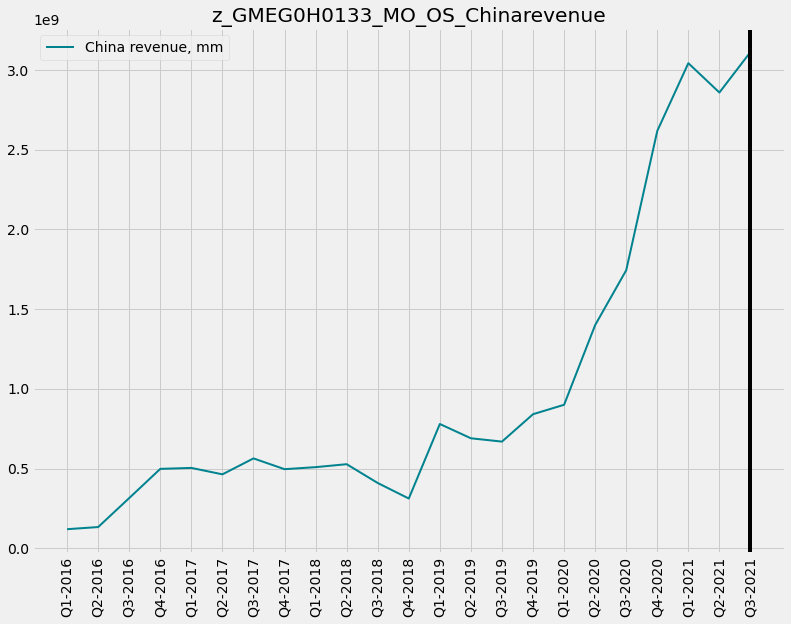

In [8]:
model_set.create_time_series_chart('TSLA US','z_GMEG0H0133_MO_OS_Chinarevenue',historical=True)

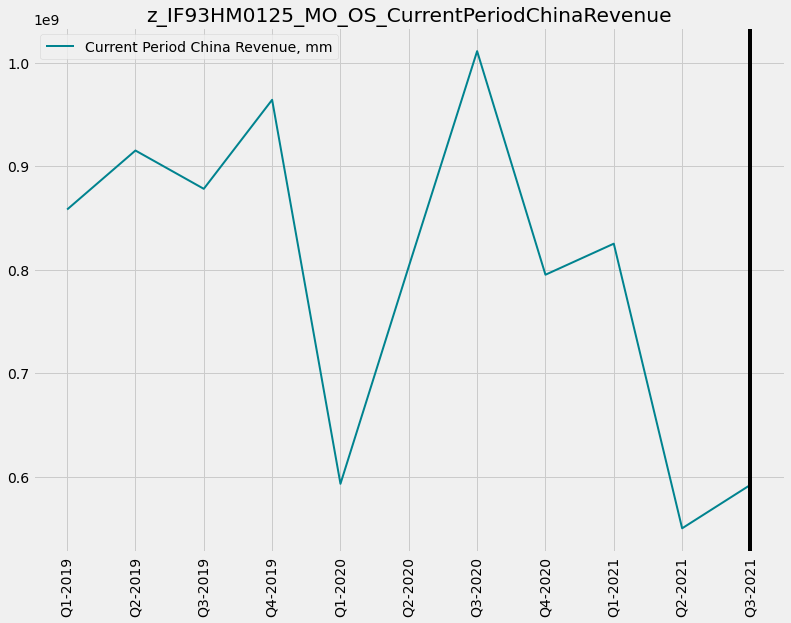

In [9]:
model_set.create_time_series_chart('F US','z_IF93HM0125_MO_OS_CurrentPeriodChinaRevenue',historical=True)

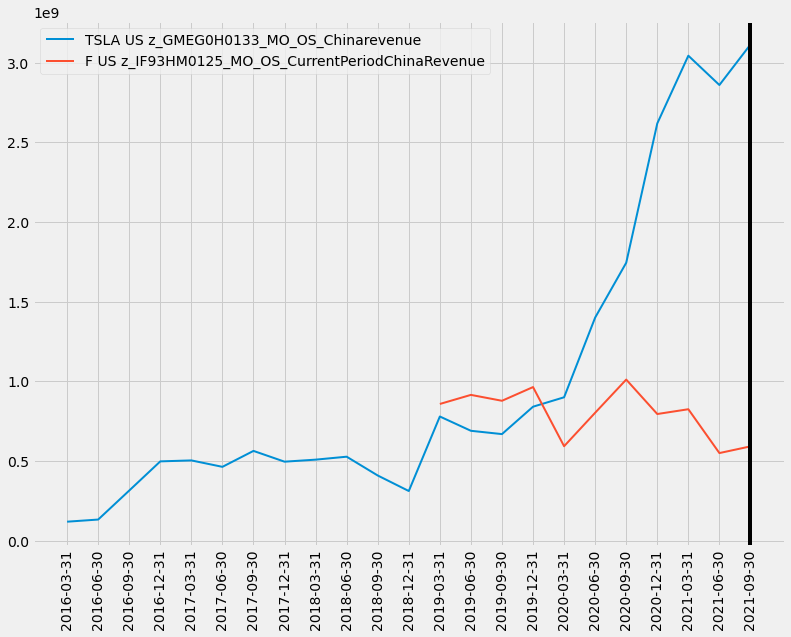

In [10]:
model_set.create_time_series_chart(time_series_name=['z_GMEG0H0133_MO_OS_Chinarevenue',
                                    'z_IF93HM0125_MO_OS_CurrentPeriodChinaRevenue'],
                                   historical=True)